# Helpful Tutorial
https://www.machinelearningplus.com/time-series/time-series-analysis-python/


In [145]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [146]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

df

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869
...,...,...
199,2008-02-01,21.654285
200,2008-03-01,18.264945
201,2008-04-01,23.107677
202,2008-05-01,22.912510


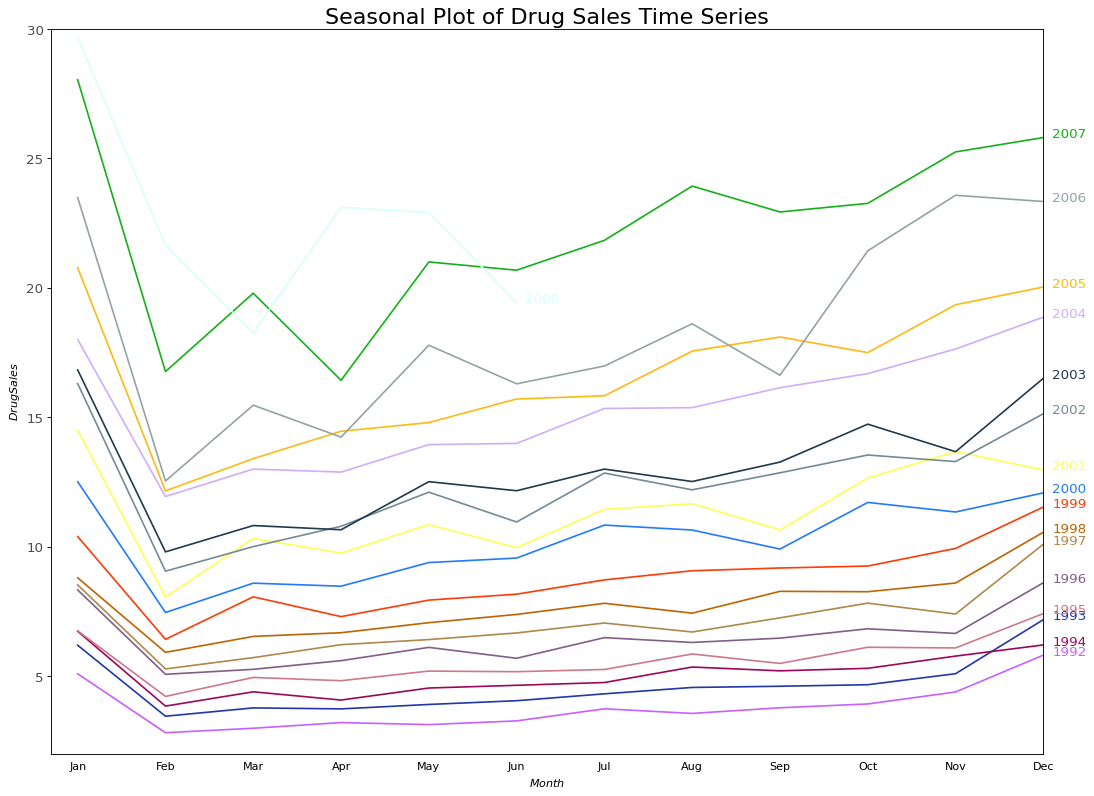

In [147]:
# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

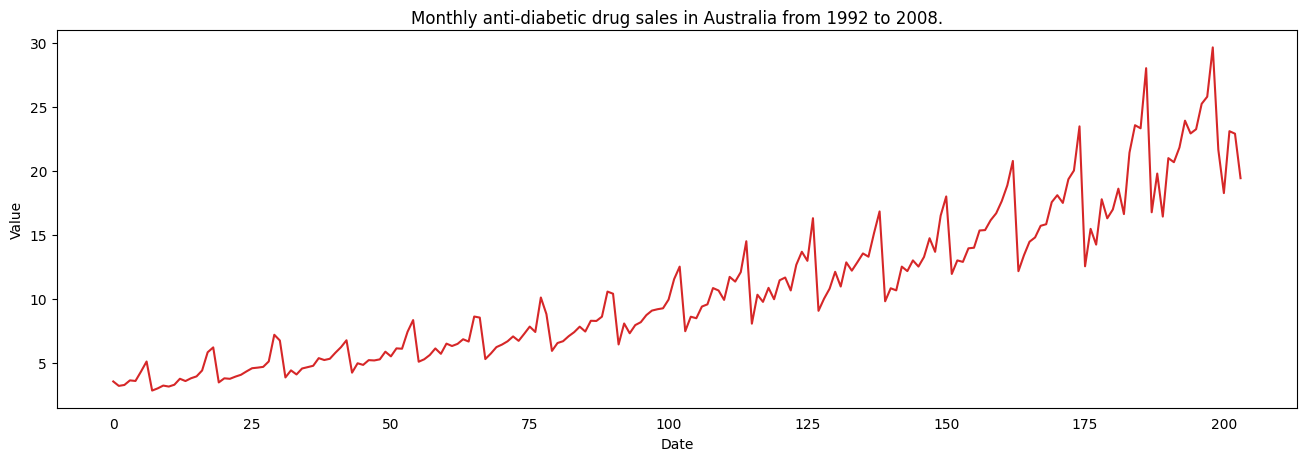

In [148]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')    

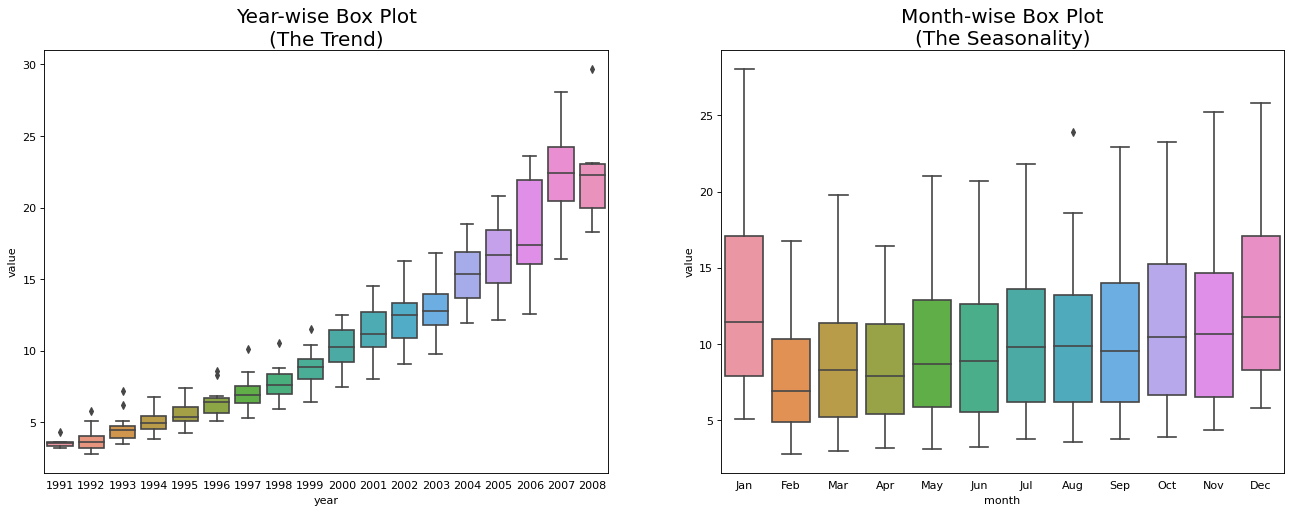

In [149]:
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

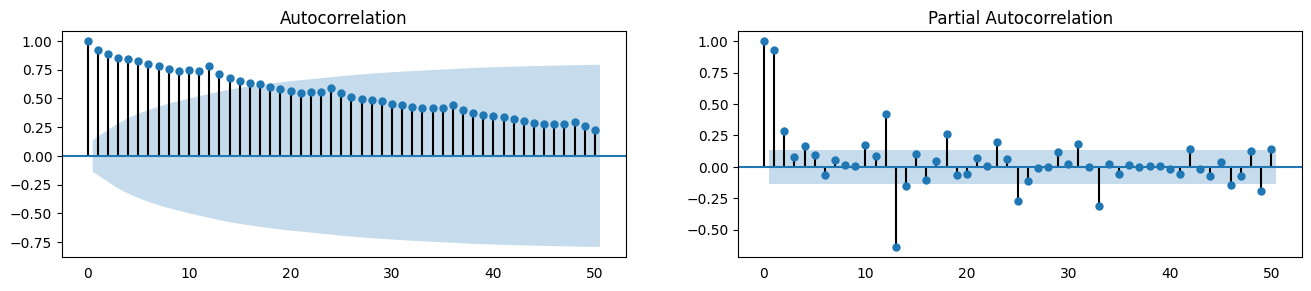

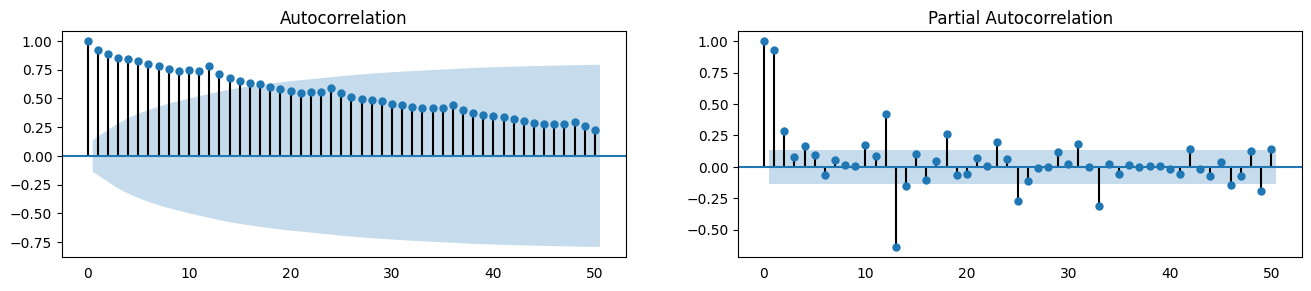

In [150]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.value.tolist(), lags=50, ax=axes[0])
plot_pacf(df.value.tolist(), lags=50, ax=axes[1])

# Class Data

In [151]:
# OBTAIN - MANY WAYS TO GET DATA - THIS IS ONE

series1 = pd.read_csv('https://raw.githubusercontent.com/2SUBDA/Block2_Walk/Week_4/Dept1.csv', header=0,
                      index_col="Date", parse_dates=["Date"])

series1 = series1.sort_index()
series1.head()

,Sales,IsHoliday
Date,,
2010-02-05,24924.50,False
2010-02-12,46039.49,True
2010-02-19,41595.55,False
2010-02-26,19403.54,False
2010-03-05,21827.90,False


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


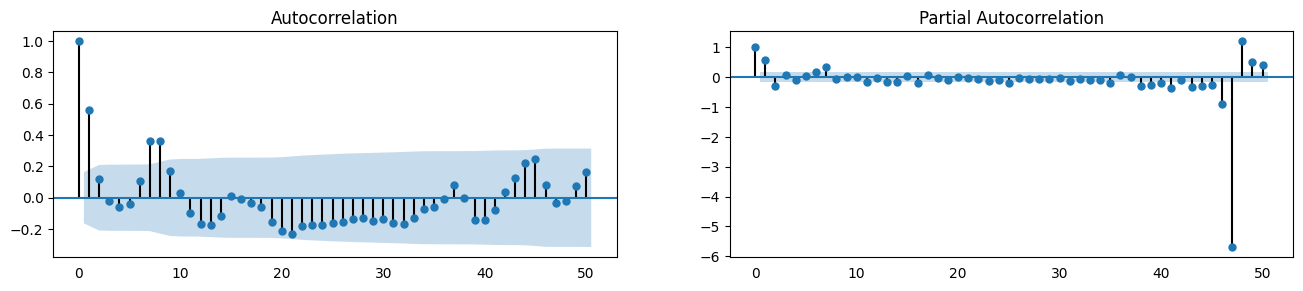

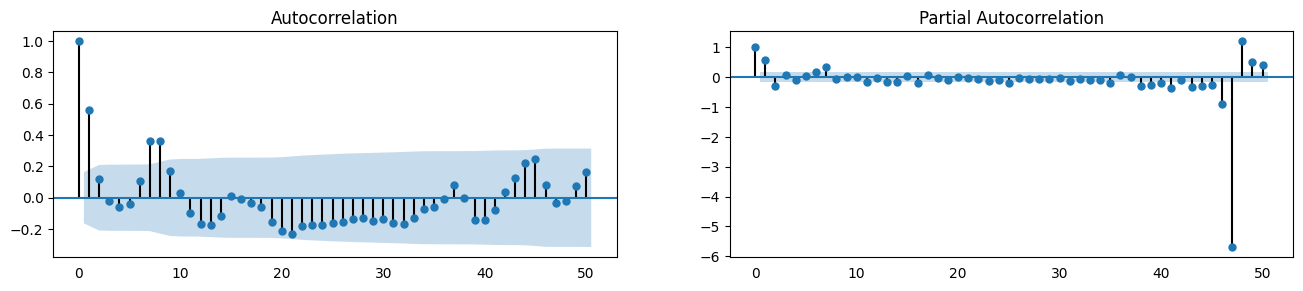

In [152]:
# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(series1.Sales.tolist(), lags=50, ax=axes[0])
plot_pacf(series1.Sales.tolist(), lags=50, ax=axes[1])

# New Data (WOOOH Internet)

In [153]:
series1 = pd.read_csv('https://download.data.world/s/sxxcjnwegofaccvceromilgoohfkkl', header=0,
                      index_col="saledate", parse_dates=["saledate"])

series1 = series1.sort_index()
series1.head()

,courseid,coursename,saleid,reportdate,itemid,itemdescription,actualprice,quantity,salestax,lmpfield
saledate,,,,,,,,,,
2015-12-26 07:25:00,16,Seneca Golf Course,2540511,2015-12-26T00:00:00,2738,WE Annual Green Fee,4,1,0,AdultFeeWAnnual
2015-12-26 07:25:00,16,Seneca Golf Course,2540511,2015-12-26T00:00:00,3370,Coffee,1,1,0,Food
2015-12-26 07:27:00,16,Seneca Golf Course,2540512,2015-12-26T00:00:00,3395,Tees - 50 Pack,3,1,0,Merchandise
2015-12-26 07:34:00,16,Seneca Golf Course,2540513,2015-12-26T00:00:00,3376,Crackers,0,1,0,Food
2015-12-26 07:34:00,16,Seneca Golf Course,2540513,2015-12-26T00:00:00,3370,Coffee,1,1,0,Food


In [154]:
series1.describe()

,courseid,saleid,itemid
count,5000.000000,5.000000e+03,5000.000000
mean,17.515200,2.543774e+06,7972.719400
std,3.575238,1.836555e+03,4708.612022
min,12.000000,2.540511e+06,1006.000000
25%,16.000000,2.541802e+06,3375.000000
50%,16.000000,2.543928e+06,6129.000000
75%,21.000000,2.545431e+06,11798.500000
max,24.000000,2.546979e+06,18008.000000


## Why is tuna salad a price?

In [155]:
series1['actualprice'].unique()

array(['4', '1', '3', '0', '13', '14', '2', '8', '25', '12', '11', '10',
       '-1', '100', '50', '9', '20', '40', '275', '6', '5', '35', '65',
       '7', '200', '24', '16', '28', '125', '85', '21', '22', '175', '51',
       '15', '400', '-2', '150', '39', '130', '60', '55', '23',
       'Chicken and Tuna Salad', '27', '18', '34', 'Brats', '250', '2300'],
      dtype=object)

In [156]:
series1= series1[series1.actualprice.apply(lambda x: x.isnumeric())]

## No tuna for you...

In [157]:
 import numpy as np
 series1['actualprice']=series1.actualprice.astype(np.float)
 series1

,courseid,coursename,saleid,reportdate,itemid,itemdescription,actualprice,quantity,salestax,lmpfield
saledate,,,,,,,,,,
2015-12-26 07:25:00,16,Seneca Golf Course,2540511,2015-12-26T00:00:00,2738,WE Annual Green Fee,4.0,1,0,AdultFeeWAnnual
2015-12-26 07:25:00,16,Seneca Golf Course,2540511,2015-12-26T00:00:00,3370,Coffee,1.0,1,0,Food
2015-12-26 07:27:00,16,Seneca Golf Course,2540512,2015-12-26T00:00:00,3395,Tees - 50 Pack,3.0,1,0,Merchandise
2015-12-26 07:34:00,16,Seneca Golf Course,2540513,2015-12-26T00:00:00,3376,Crackers,0.0,1,0,Food
2015-12-26 07:34:00,16,Seneca Golf Course,2540513,2015-12-26T00:00:00,3370,Coffee,1.0,1,0,Food
...,...,...,...,...,...,...,...,...,...,...
2016-01-08 11:43:00,23,Crescent Hill Golf Course,2546975,2016-01-08T00:00:00,14244,Winter WD Green Fee,10.0,1,0,RegPlayWkday
2016-01-08 11:43:00,23,Crescent Hill Golf Course,2546975,2016-01-08T00:00:00,14348,18 hole 1/2 cart,13.0,1,0,18HoleRentals
2016-01-08 11:44:00,23,Crescent Hill Golf Course,2546978,2016-01-08T00:00:00,14348,18 hole 1/2 cart,13.0,1,0,18HoleRentals


In [158]:
series1.describe()

,courseid,saleid,itemid,actualprice
count,4794.000000,4.794000e+03,4794.000000,4794.000000
mean,17.547977,2.543774e+06,8171.031081,7.104714
std,3.628810,1.828965e+03,4699.836104,35.153734
min,12.000000,2.540511e+06,1006.000000,0.000000
25%,16.000000,2.541810e+06,3374.000000,2.000000
50%,16.000000,2.543926e+06,11310.000000,4.000000
75%,22.000000,2.545431e+06,12000.750000,10.000000
max,24.000000,2.546979e+06,18008.000000,2300.000000


In [159]:
# calculate summary statistics
from numpy import mean
from numpy import std
data_mean, data_std = mean(series1['actualprice']), std(series1['actualprice'])
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

In [160]:
# identify outliers
outliers = [x for x in series1['actualprice'] if x < lower or x > upper]

In [161]:
# remove outliers
outliers_removed = [x for x in series1['actualprice'] if x > lower and x < upper]

In [162]:
print('Identified outliers: %d' % len(outliers))
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 12
Non-outlier observations: 4782


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


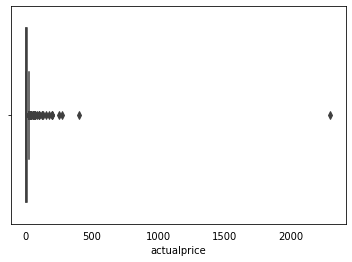

In [163]:
sns.boxplot(series1['actualprice'])

In [164]:
print("Highest allowed",series1['actualprice'].mean() + 3*series1['actualprice'].std())
print("Lowest allowed",series1['actualprice'].mean() - 3*series1['actualprice'].std())

Highest allowed 112.5659149857494
Lowest allowed -98.35648653351745


In [165]:
new_df = series1[(series1['actualprice'] < 15) & (series1['actualprice'] > 0)]
series1=new_df

## Lazy. but cleaner data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


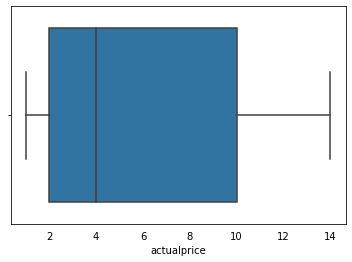

In [166]:
sns.boxplot(series1['actualprice'])

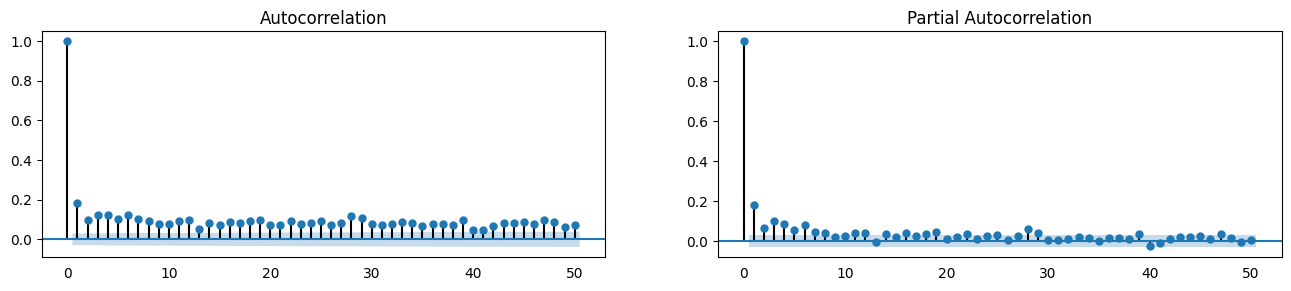

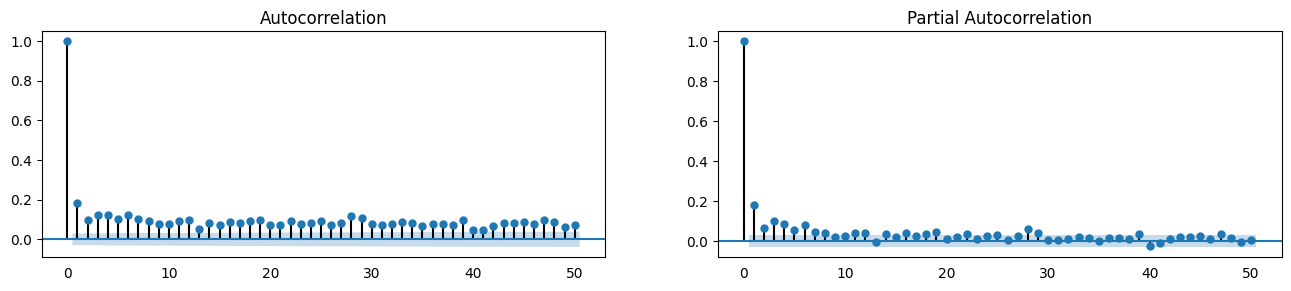

In [167]:
# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(series1.actualprice.tolist(), lags=50, ax=axes[0])
plot_pacf(series1.actualprice.tolist(), lags=50, ax=axes[1])